In [5]:
# Imports
import pickle
import time
import matplotlib.pyplot as plt
import sys
sys.path.append('../../../')
from src import customFunc as cf
from src import ansatzs as anz
from src import mitigation as mit

In [2]:
with open("data/hamiltonian1.000.pkl", "rb") as f:
    hamiltonian = pickle.load(f)
with open("data/nuclear_repulsion1.000.pkl", "rb") as f:
    nuclear_repulsion = pickle.load(f)

In [3]:
# Hamiltonians
with open(f"data/hamiltonian0.719.pkl", "rb") as f:
    hamiltonian = pickle.load(f)
# Repulsion energies
with open(f"data/nuclear_repulsion0.719.pkl", "rb") as f:
    nuclear_repulsion = pickle.load(f)

In [4]:
num_qubits=hamiltonian.num_qubits
times=[]
energies=[]
total_iters=[]
for i in range(1,11):
    num_layers=i
    #cf.expand_observable(hamiltonian, num_qubits)
    ansatz, n_params = anz.build_Nlocal_ansatz(num_qubits, num_layers)
    t0 = time.time()
    results=mit.VQE_minimization(ansatz, hamiltonian)
    t1 = time.time()
    times.append(t1-t0)
    energies.append(results["cost_history"][-1]+nuclear_repulsion)
    total_iters.append(results["iters"])

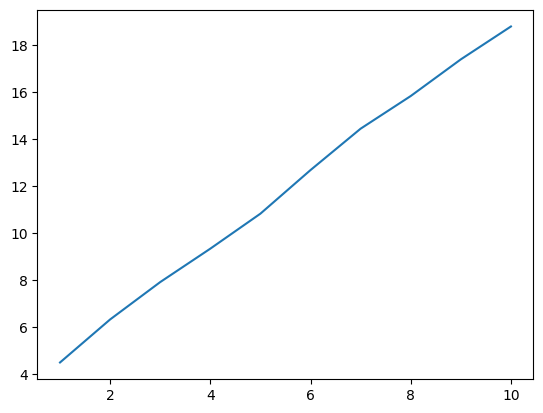

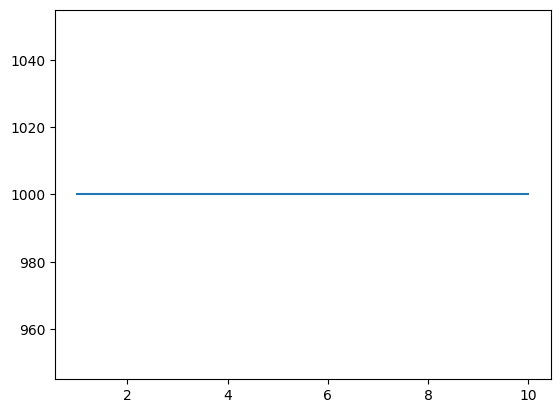

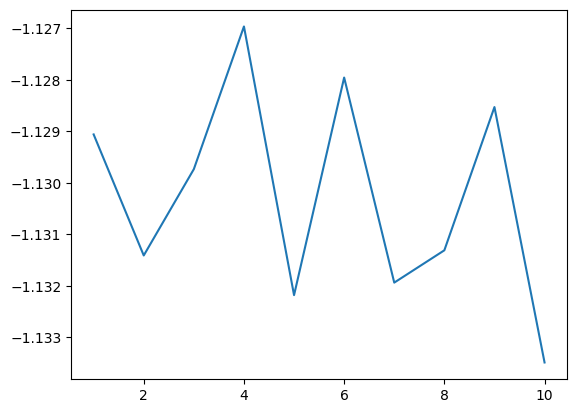

In [8]:
plt.plot(range(1,11), times)
plt.show()
plt.plot(range(1,11), total_iters)
plt.show()
plt.plot(range(1,11), energies)
plt.show()

In [ ]:
num_qubits=hamiltonian.num_qubits
res_normal= {"times":[], "iters": [], "energies": []}
res_all_layers= {"times":[], "iters": [], "energies": []}
res_some_layers= {"times":[], "iters": [], "energies": []}
for i in range(1,11):
    num_layers=i
    #cf.expand_observable(hamiltonian, num_qubits)
    ansatz, n_params = anz.build_Nlocal_ansatz(num_qubits, num_layers)
    t0 = time.time()
    optimization_normal=mit.VQE_minimization(ansatz, hamiltonian)
    t1 = time.time()
    res_normal["times"].append(t1-t0)
    res_normal["iters"].append(optimization_normal["iters"])
    res_normal["energies"].append(optimization_normal["cost_history"][-1])
    t0 = time.time()
    optimization_all_layers=mit.VQE_minimization_layer_training(ansatz, hamiltonian, num_layers, num_layers)
    t1 = time.time()
    res_all_layers["times"].append(t1-t0)
    res_all_layers["iters"].append(optimization_all_layers["iters"])
    res_all_layers["energies"].append(optimization_all_layers["cost_history"][-1])
    t0 = time.time()
    optimization_some_layers=mit.VQE_minimization_layer_training(ansatz, hamiltonian, num_layers, 1)
    t1 = time.time()
    res_some_layers["times"].append(t1-t0)
    res_some_layers["iters"].append(optimization_some_layers["iters"])
    res_some_layers["energies"].append(optimization_some_layers["cost_history"][-1])
    times.append(t1-t0)
    energies.append(results["cost_history"][-1]+nuclear_repulsion)
    total_iters.append(results["iters"])

In [ ]:
cost_history_dict["cost_history"]
# Show the evolution of the cost function
if plot_info:
    fig, ax = plt.subplots()
    ax.plot(range(cost_history_dict["iters"]), cost_history_dict["cost_history"], label=r"$\langle O\rangle$")
    ax.set_xlabel("Iteraciones")
    ax.set_ylabel(r"$\langle O\rangle$")
    ax.set_title(f"Minimización")
    plt.legend()
    plt.show()
    print(f"End of optimization. Found optimal value: {res.fun}")
    print("=====================================================")